### Problem Statement:

Customer Behaviour and it’s prediction lies at the core of every Business Model. From Stock Exchange, e Commerce and
Automobile to even Presidential Elections, predictions serve a great purpose. Most of these predictions are based on the data
available about a person’s activity either online or in person. Recommendation Engines are the much needed manifestations of the desired Predictability of User Activity. Recommendation Engines move one step further and not only give information but
put forth strategies to further increase users interaction with the platform. In today’s world OTT platform and Streaming
Services have taken up a big chunk in the Retail and Entertainment industry. Organizations like Netflix, Amazon etc.
analyse User Activity Pattern’s and suggest products that better suit the user needs and choices. For the purpose of this Project we will be creating one such Recommendation Engine from the ground up, where every single user, based on there area of interest and ratings, would be recommended a list of movies that are best suited for them.

### Objective:

1. Find out the list of most popular and liked genre
2. Create Model that finds the best suited Movie for one user in every genre.
3. Find what Genre Movies have received the best and worst ratings based on User Rating.

### Dataset Information:

1. ID - Contains the separate keys for customer and movies.
2. Rating - A section contains the user ratings for all the movies.
3. Genre - Highlights the category of the movie.
4. Movie Name - Name of the movie with respect to the movie id.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
# Skip date
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\Python intellipat\Projects\Capstone Projects\Netflix\combined_data_1.txt', 
                  header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [4]:
# Convert Ratings column to a float
# df['Rating'] = df['Rating'].astype(float)

print('Dataset 1 shape: {}'.format(df.shape))

Dataset 1 shape: (24058263, 2)


In [5]:
#To find the distribution of different ratings in the datset

ratings_count = df.groupby('Rating')['Rating'].count()

# OR
# ratings_count = df['Rating'].value_counts()
#OR
# p = df.groupby('Rating')['Rating'].agg(['count'])

In [6]:
ratings_count = pd.DataFrame(ratings_count)
ratings_count

,Rating
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [7]:
ratings_count.rename(columns = {'Rating':'Count'}, inplace = True)

In [8]:
ratings_count

,Count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [9]:
ratings_count.sort_values(by='Count', ascending=False)

,Count
Rating,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


In [10]:
# Now to calculate how many movies we are having in the dataset

df.isna().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [11]:
#1 in the square brackets is the index of the count of null values in the ratings column
movie_count = df.isnull().sum()[1]
movie_count

4499

In [12]:
#will display number of unique values of the column
df['Cust_Id'].nunique()

475257

In [13]:
#will display unique values of the column
df['Cust_Id'].unique()

array(['1:', '1488844', '822109', ..., '72311', '4499:', '594210'],
      dtype=object)

In [14]:
# df['Cust_Id'].value_counts()

In [15]:
#get customer count

cust_count = df['Cust_Id'].nunique() - movie_count
cust_count

470758

In [16]:
#get ratings count

rating_count = df['Cust_Id'].count() - movie_count
rating_count

24053764

In [17]:
ratings_count.reset_index(inplace = True)

In [18]:
ratings_count

,Rating,Count
0,1.0,1118186
1,2.0,2439073
2,3.0,6904181
3,4.0,8085741
4,5.0,5506583


(0.0, 8490028.05, -0.5, 4.5)

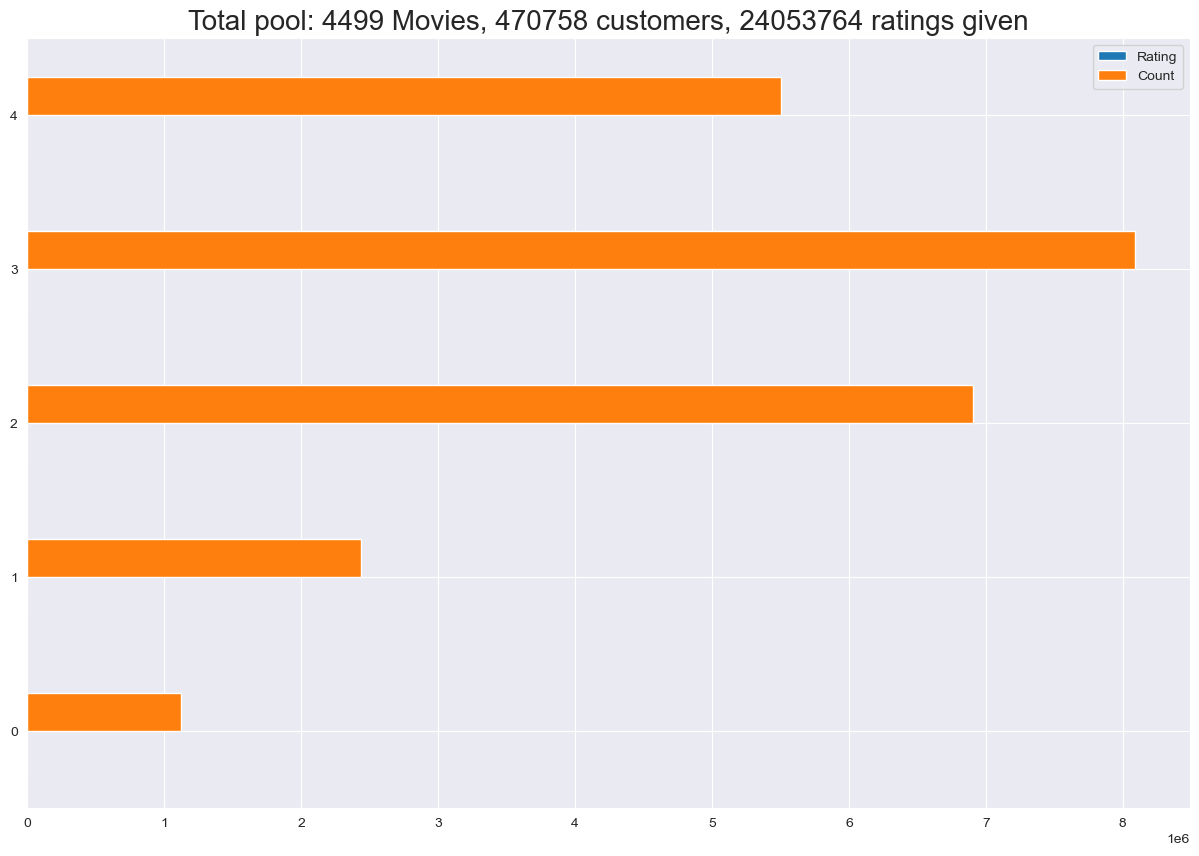

In [19]:
ax = ratings_count.plot(kind = 'barh', legend = True, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('on')

In [20]:
# To count all the 'nan' values in the Ratings column in the 'ratings' Dataset
#add another column that will have movie id

df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [21]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating']==True]
df_nan.shape

(4499, 1)

In [22]:
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [23]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [24]:
#To create a numpy array containing movie ids according the 'ratings' dataset

movie_np = []
movie_id = 1
#into tuple
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [25]:
df = df[pd.notnull(df['Rating'])]
df['movie_id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype('int')
print('Now the Dataset will look like: ')
df.tail()

Now the Dataset will look like: 


,Cust_Id,Rating,movie_id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


### Data Pre-processing Steps

In [26]:
# Now we will remove all the users that have rated less movies and 
#also all those movies that has been rated less in number

f = ['count', 'mean']

In [27]:
#To create a list of all the movies rated less often(only include top 30% rated movies)
dataset_movie_summary = df.groupby('movie_id')['Rating'].agg(f)

# now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
dataset_movie_summary.index = dataset_movie_summary.index.map(int)

# now we will create a benchmark
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.7),0)

drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

print('Movie minimum times of review: {}'.format(movie_benchmark))

Movie minimum times of review: 1799.0


In [28]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [29]:
print(f'Original Shape: {df.shape}')

Original Shape: (24053764, 3)


In [30]:
df = df[~df['movie_id'].isin(drop_movie_list)]
# ~ symbol will not include the true values coming from the isin()
df = df[~df['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(df.shape))

After the triming, the shape is: (17337458, 3)


In [31]:
df.head()

,Cust_Id,Rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [32]:
# now we will prepare the dataset for SVD and it takes the matrix as the input
df_pivot = pd.pivot_table(df,values='Rating',index='Cust_Id', columns='movie_id')
df_pivot.shape

(143458, 1350)

In [33]:
df_pivot.head()

movie_id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### importing new dataset

In [34]:
df_title = pd.read_csv(r'C:\Users\Lenovo\Desktop\Python intellipat\Projects\Capstone Projects\Netflix\movie_titles.csv',
                      encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id', 'year', 'Name'])
df_title.set_index('Movie_Id', inplace=True)
df_title.head(10)

,year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


### Algorithm for the Project and Model Evaluation

In [35]:
import math
import re
from scipy.sparse import csr_matrix
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [36]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(df[['Cust_Id', 'movie_id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9930  1.0010  1.0004  0.9981  0.0036  
MAE (testset)     0.8015  0.8089  0.8019  0.8041  0.0034  
Fit time          0.99    1.08    1.93    1.33    0.42    
Test time         0.45    0.53    0.38    0.45    0.06    


{'test_rmse': array([0.99302262, 1.00100965, 1.00041361]),
 'test_mae': array([0.80146272, 0.80894126, 0.80189111]),
 'fit_time': (0.9913668632507324, 1.0804564952850342, 1.9280002117156982),
 'test_time': (0.44600772857666016, 0.5264651775360107, 0.37690138816833496)}

#### To find all the movies rated as 5 stars by user with userId = 712664

In [37]:
# so first we take user 712664 and we try to recommend some movies based on the past data

dataset_712664 = df[(df['Cust_Id']==712664) & (df['Rating']==5)]
dataset_712664 = dataset_712664.set_index('movie_id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

movie_id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
442                  Mississippi Burning
Name: Name, dtype: object

#### Train an SVD to predict ratings for user with userId = 1

In [38]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#To remove all the movies rated less often 
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]


# getting full dataset
data = Dataset.load_from_df(df[['Cust_Id', 'movie_id', 'Rating']], reader)

#create a training set for svd
trainset = data.build_full_trainset()
svd.fit(trainset)

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        year                        Name  Estimate_Score
3927  2004.0          Nip/Tuck: Season 2        5.000000
871   1954.0               Seven Samurai        5.000000
3289  1974.0               The Godfather        5.000000
174   1992.0              Reservoir Dogs        5.000000
2101  1994.0      The Simpsons: Season 6        5.000000
1031  1992.0                 Hard Boiled        4.918162
995   1961.0                     Yojimbo        4.901737
198   1978.0             The Deer Hunter        4.901410
1290  1960.0  The Twilight Zone: Vol. 19        4.875295
3797  1973.0                   The Sting        4.850041
